<a href="https://colab.research.google.com/github/21700185-kimtaehong/Int_AI_sample/blob/main/0404.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32
input_img = Input(shape=(784,)) #784 = 28x28
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoder = Model(input_img, encoded)

In [2]:
#need to re-define input layer for decoder input
encoded_input = Input(shape=(encoding_dim,))
decoded = Dense(784, activation='sigmoid')(encoded_input)
decoder = Model(encoded_input, decoded)

outputs = decoder(encoder(input_img))
autoencoder = Model(input_img, outputs)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [3]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

# float32 / 255 : 값을 0~1로 만들기
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


11490434/11490434 [==============================] - 2s 0us/step


In [4]:
autoencoder.fit(x_train, x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Epoch 1/50
235/235 [==============================] - 6s 5ms/step - loss: 0.2758 - val_loss: 0.1899
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1713 - val_loss: 0.1540
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1446 - val_loss: 0.1338
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1287 - val_loss: 0.1213
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1183 - val_loss: 0.1127
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1110 - val_loss: 0.1068
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1058 - val_loss: 0.1024
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1021 - val_loss: 0.0993
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0994 - val_loss: 0.0970
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0976 - val_loss: 0.0956

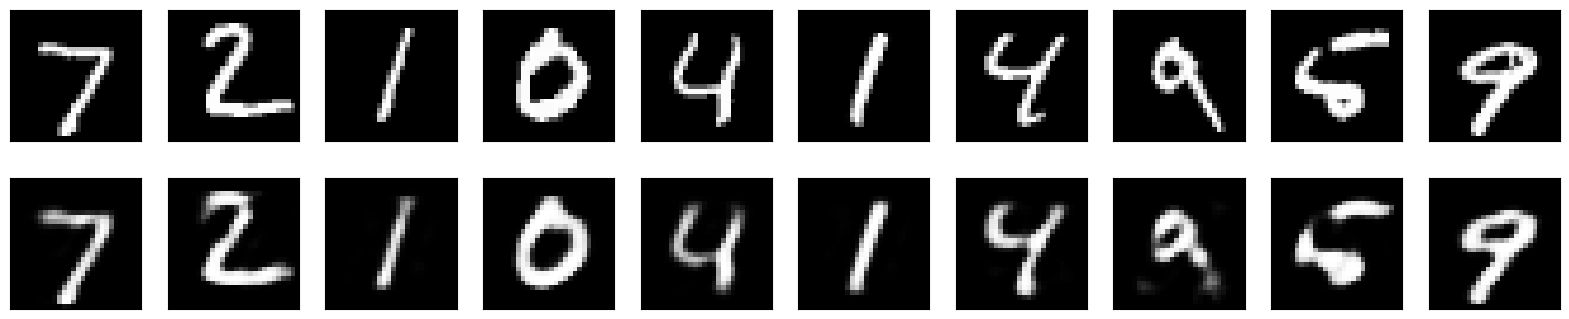

In [5]:
import matplotlib.pyplot as plt

n = 10 # how many digits we will display
plt.figure(figsize=(20, 4))

for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
plt.show()


In [6]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

def preprocess(array): 
  """ 
  Normalizes the supplied array and reshapes it into the appropriate format. 
  """ 
  
  array = array.astype("float32") / 255.0
  array = np.reshape(array, (len(array), 28, 28, 1))
  return array

In [7]:
(train_data, _), (test_data, _) = mnist.load_data()
# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

In [8]:
input = layers.Input(shape=(28, 28, 1))
# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)
# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248

In [9]:
autoencoder.fit(
  x=train_data,
  y=train_data,
  epochs=50,
  batch_size=128,
  shuffle=True,
  validation_data=(test_data, test_data),
)

Epoch 1/50
469/469 [==============================] - 11s 9ms/step - loss: 0.1398 - val_loss: 0.0733
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0717 - val_loss: 0.0696
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0694 - val_loss: 0.0683
Epoch 4/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0683 - val_loss: 0.0673
Epoch 5/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0675 - val_loss: 0.0667
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0669 - val_loss: 0.0661
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0664 - val_loss: 0.0658
Epoch 8/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0660 - val_loss: 0.0654
Epoch 9/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0657 - val_loss: 0.0651
Epoch 10/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0654 - val_loss: 0.064

In [10]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

313/313 [==============================] - 1s 2ms/step


array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

array([[[[2.54059887e-06],
         [1.47119806e-07],
         [3.03615764e-07],
         ...,
         [3.68233843e-09],
         [1.66367261e-06],
         [1.06714951e-05]],

        [[1.51338710e-08],
         [1.81862992e-15],
         [3.13855994e-12],
         ...,
         [2.04669746e-17],
         [7.81473324e-12],
         [2.15540311e-07]],

        [[1.80825409e-05],
         [9.71559421e-13],
         [3.01650930e-13],
         ...,
         [1.07873752e-13],
         [4.47866223e-12],
         [5.66034863e-09]],

        ...,

        [[8.27996505e-10],
         [6.93444232e-15],
         [1.37442210e-11],
         ...,
         [2.55612128e-13],
         [3.54819494e-12],
         [1.33842491e-07]],

        [[8.88882369e-07],
         [1.83508287e-12],
         [1.15177637e-12],
         ...,
         [8.87374592e-13],
         [4.94984696e-13],
         [2.17596696e-08]],

        [[4.51140249e-06],
         [3.86717177e-12],
         [1.02859127e-12],
         ...,
 

In [11]:
def noise(array):
  """
  Adds random noise to each image in the supplied array.
  """

  noise_factor = 0.4
  noisy_array = array + noise_factor * np.random.normal(
    loc=0.0, scale=1.0, size=array.shape
  )

  return np.clip(noisy_array, 0.0, 1.0)

In [12]:
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

array([[[[0.00000000e+00],
         [1.49722454e-01],
         [1.89438960e-01],
         ...,
         [5.51317779e-02],
         [0.00000000e+00],
         [2.14983192e-01]],

        [[0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
         [1.00000000e+00],
         [0.00000000e+00],
         [1.36985397e-01]],

        [[0.00000000e+00],
         [0.00000000e+00],
         [1.46122268e-01],
         ...,
         [0.00000000e+00],
         [3.48120948e-01],
         [0.00000000e+00]],

        ...,

        [[0.00000000e+00],
         [3.20847144e-01],
         [5.91843311e-01],
         ...,
         [3.22174913e-01],
         [0.00000000e+00],
         [0.00000000e+00]],

        [[3.02740203e-01],
         [2.80348209e-01],
         [0.00000000e+00],
         ...,
         [1.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00]],

        [[1.82096069e-01],
         [0.00000000e+00],
         [6.84977225e-01],
         ...,
 

In [ ]:
autoencoder.fit(
  x=noisy_train_data,
  y=train_data,
  epochs=100,
  batch_size=128,
  shuffle=True,
  validation_data=(noisy_test_data, test_data),
) 

Epoch 1/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1020 - val_loss: 0.0942
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0938 - val_loss: 0.0919
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0920 - val_loss: 0.0907
Epoch 4/100
469/469 [==============================] - 4s 7ms/step - loss: 0.0910 - val_loss: 0.0897
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0902 - val_loss: 0.0892
Epoch 6/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0896 - val_loss: 0.0886
Epoch 7/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0891 - val_loss: 0.0881
Epoch 8/100
469/469 [==============================] - 4s 7ms/step - loss: 0.0887 - val_loss: 0.0877
Epoch 9/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0883 - val_loss: 0.0875
Epoch 10/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0880 - val_lo

In [ ]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)